In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

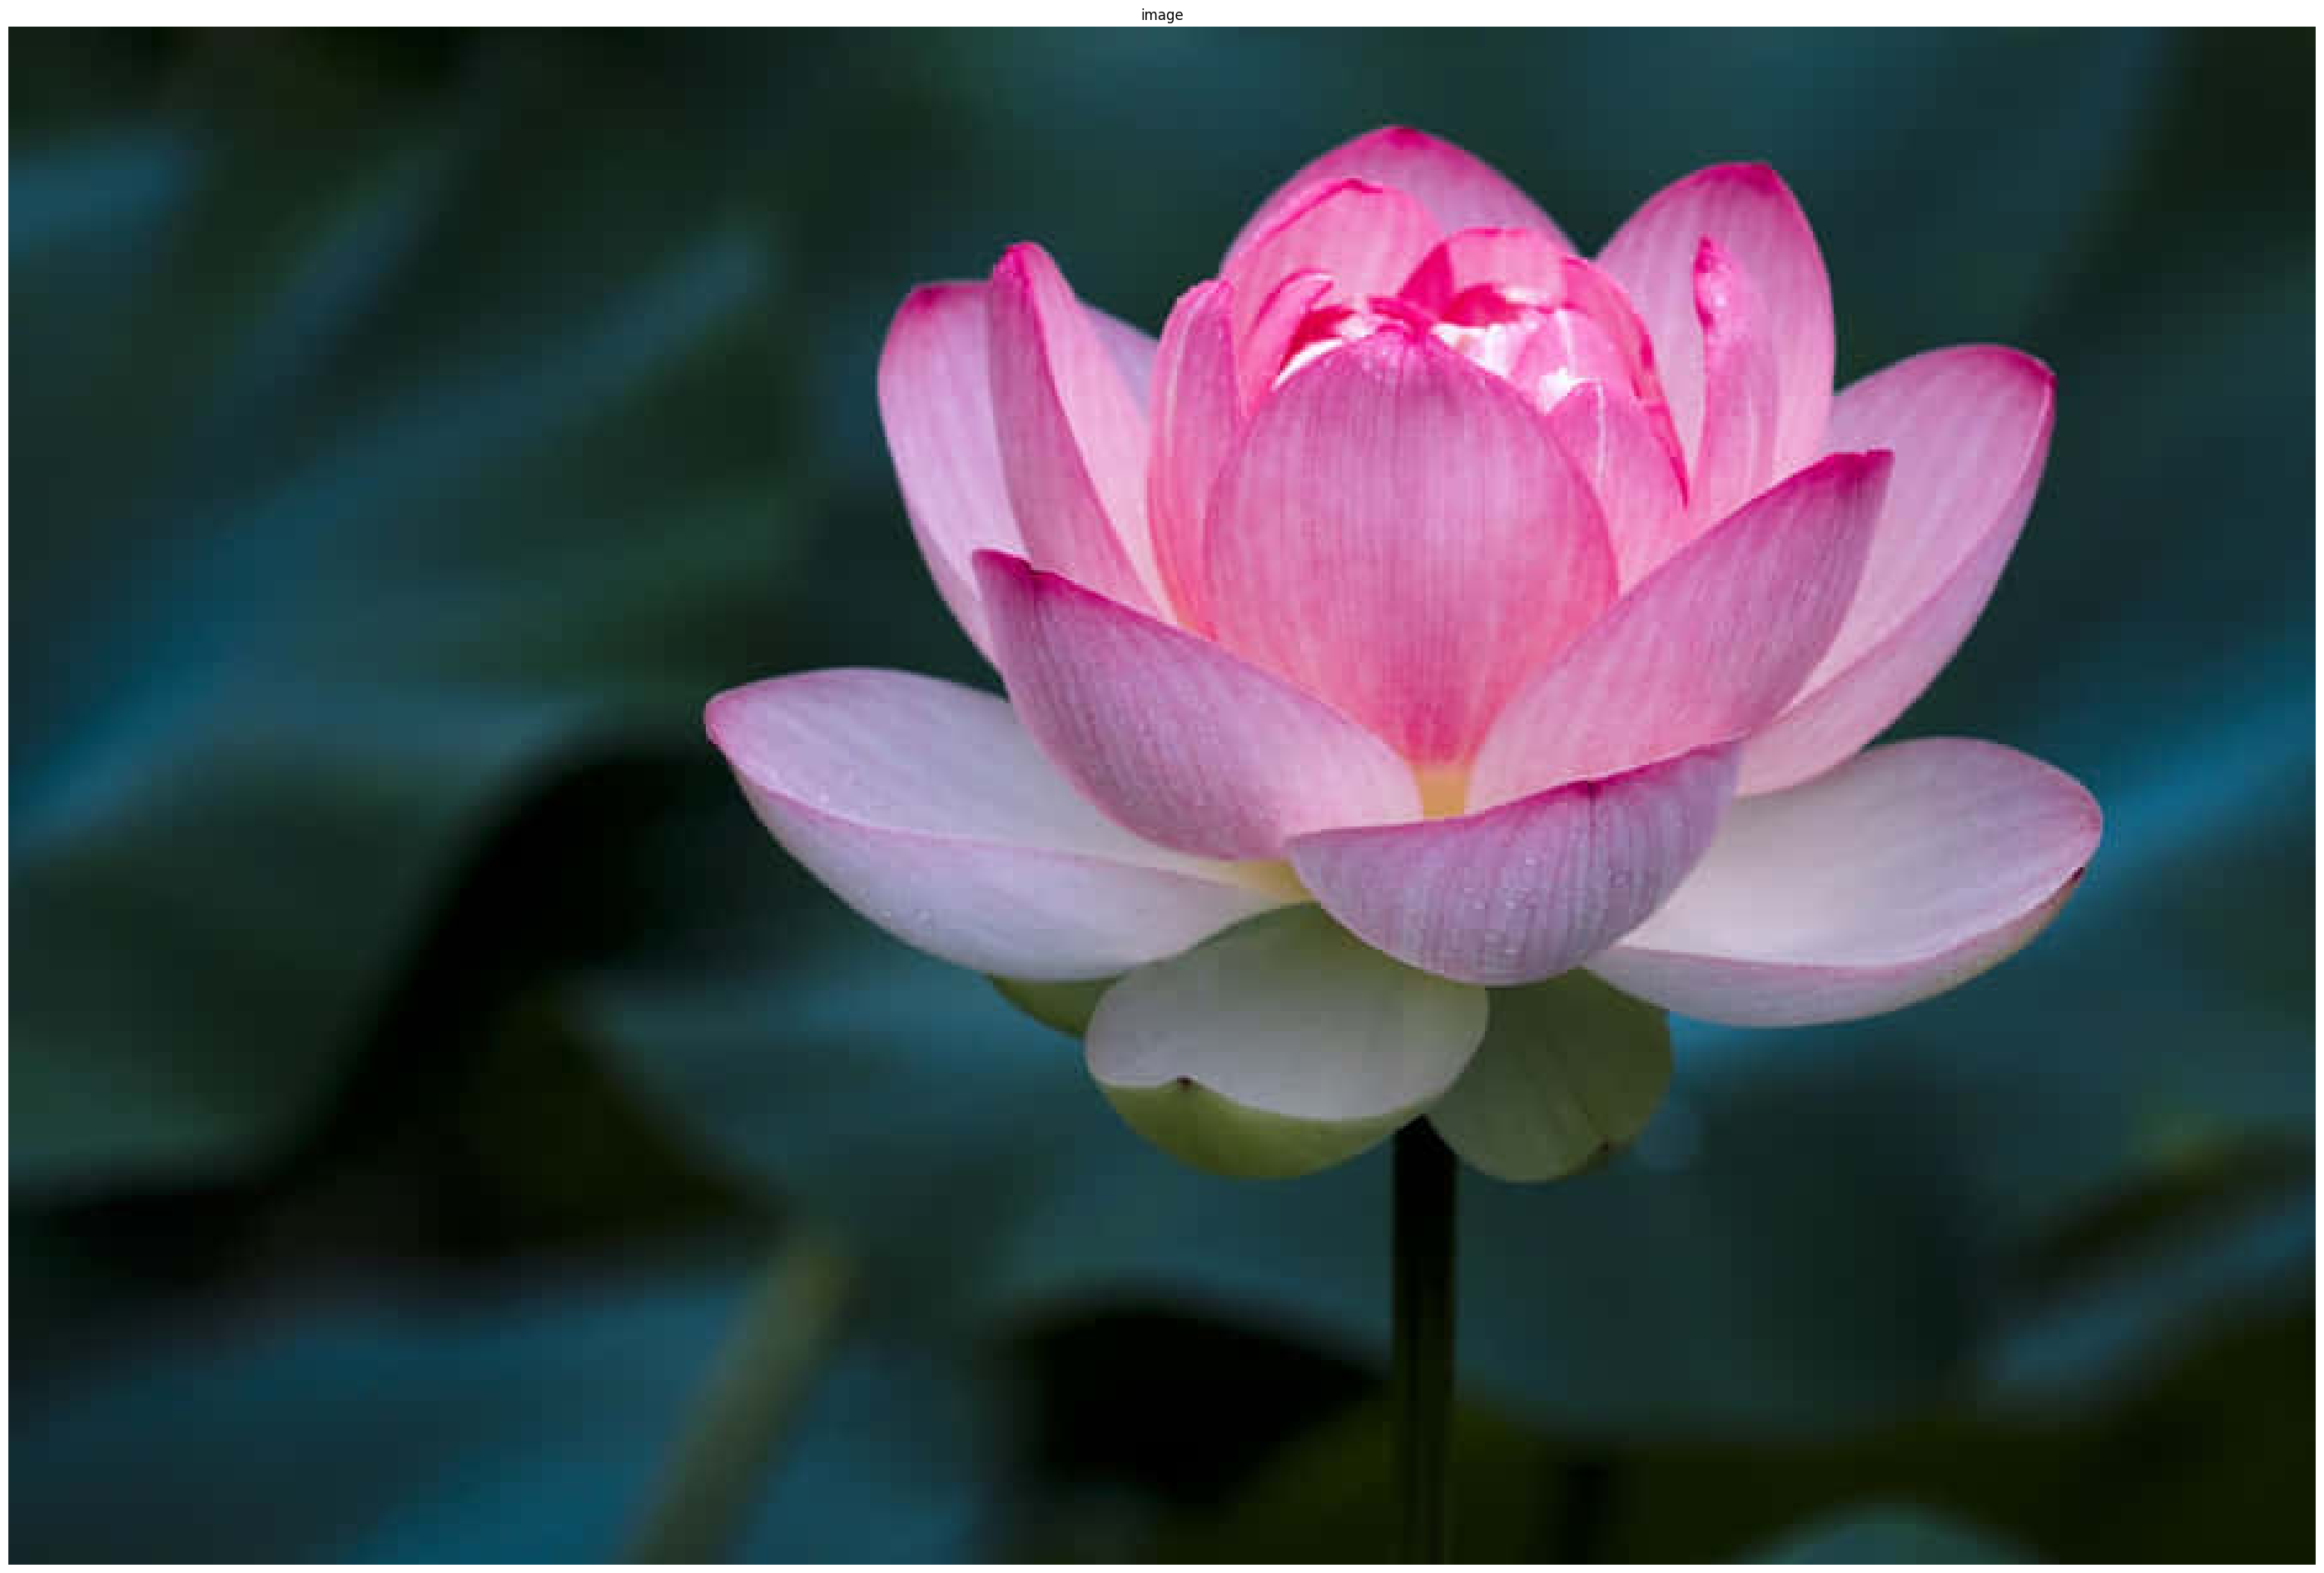

In [35]:
# Load the image using OpenCV (better for convolution)
img = cv2.imread('image.png')  # Replace with your actual image path
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert for correct display with Matplotlib
plt.figure(figsize=(36, 24))
plt.imshow(img_rgb)
plt.title('image' )
plt.axis('off')
plt.show()

In [68]:
def display_image(image, title, pos, cmap=None):
    plt.figure(figsize=(36, 24))
    plt.subplot(3, 3, pos)
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()


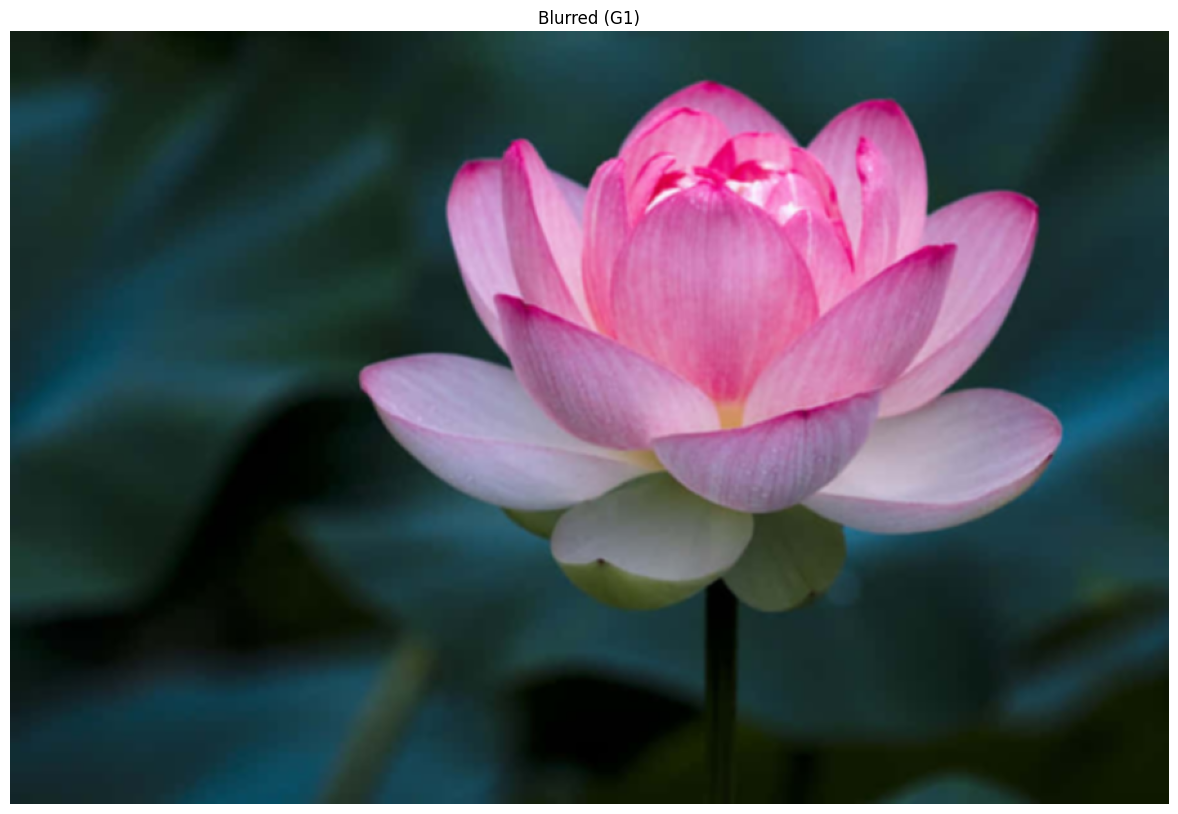

In [36]:
# --- Mean Filter (G1) ---
G1 = np.ones((3, 3), np.float32) / 9
blurred_img_g1 = cv2.filter2D(img_rgb, -1, G1)
display_image(blurred_img_g1, 'Blurred (G1)', 2)

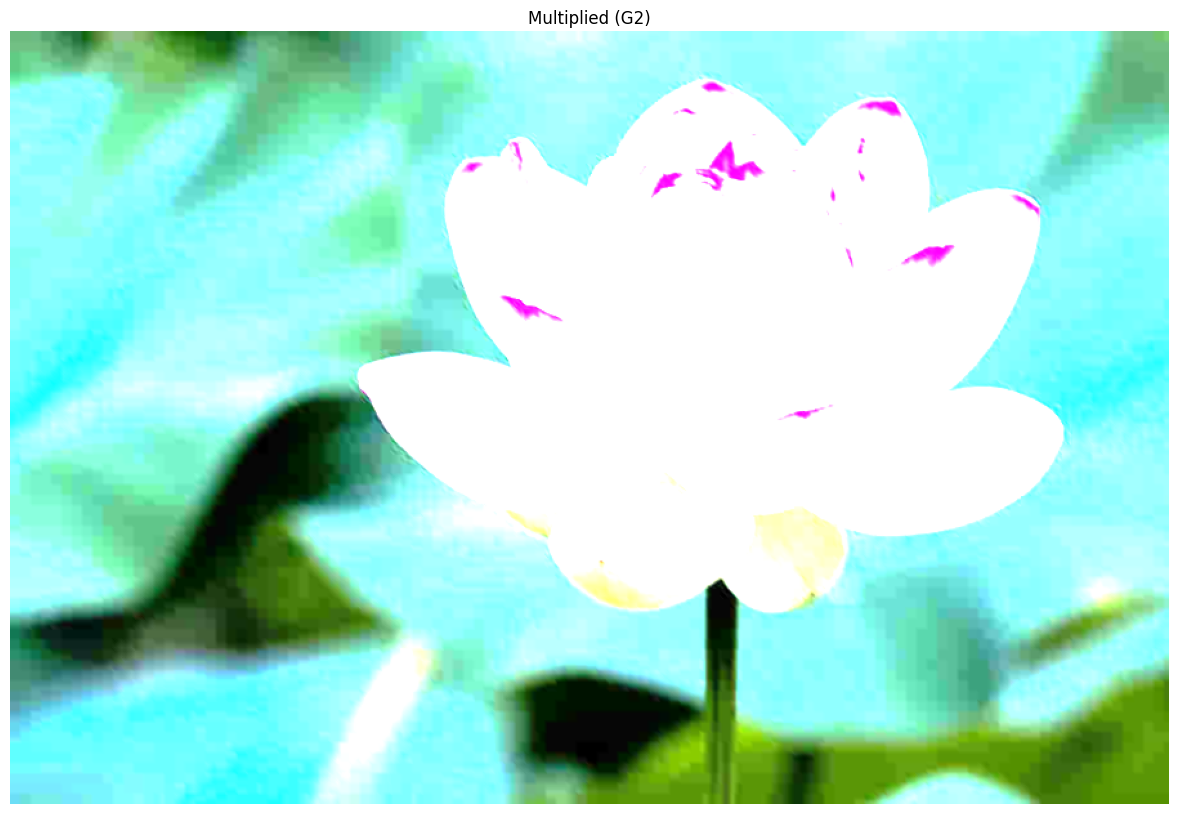

In [38]:
# --- G2 Filter (Multiply by 2) ---
G2 = 2 * np.ones(3, dtype=np.float32)   # or simply G2 = 2 * np.ones((3,3), np.float32)
#Adjust kernel size if needed

multiplied_image_g2 = cv2.filter2D(img_rgb, -1, G2)
display_image(multiplied_image_g2, 'Multiplied (G2)', 3)

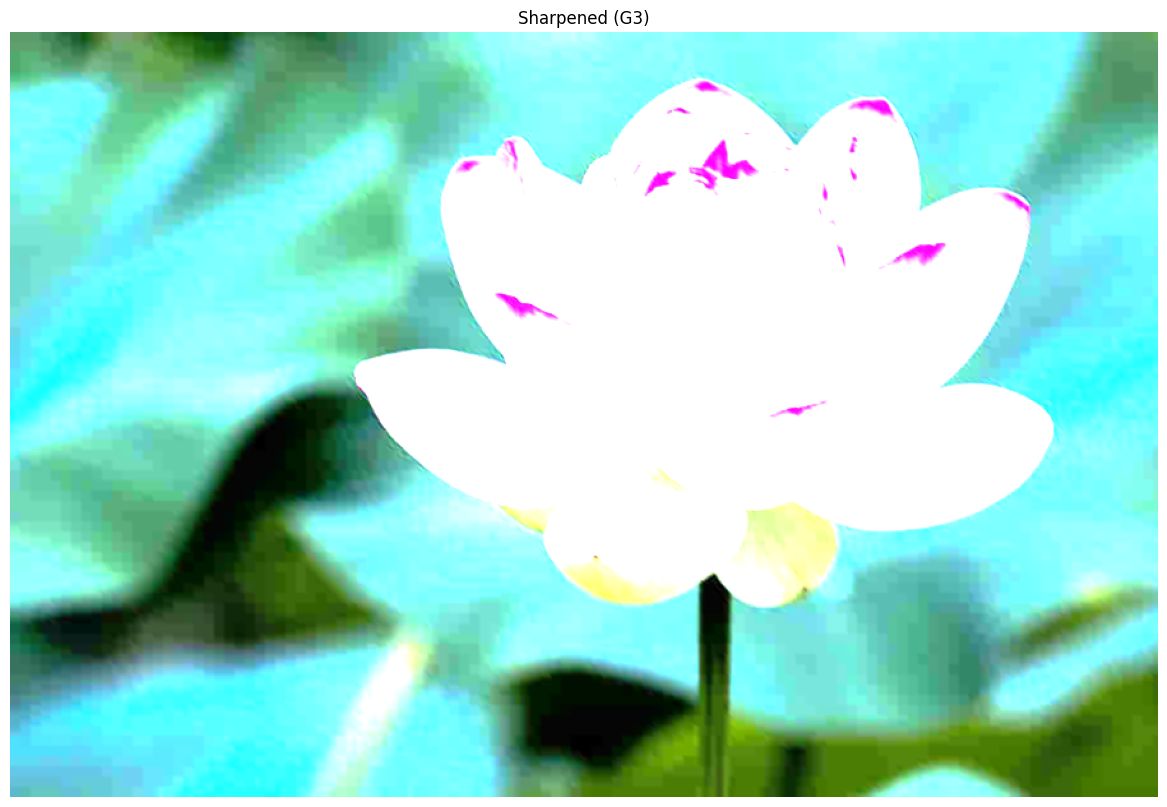

In [33]:
# --- G3 Filter (Sharpening) ---

G3 = G2 - G1 # if  G2 = 2 * np.ones((3,3), np.float32), else find another way to create sharpening filter from G1 & G2.
sharpened_image = cv2.filter2D(img_rgb, -1, G3)
display_image(sharpened_image, 'Sharpened (G3)', 4)

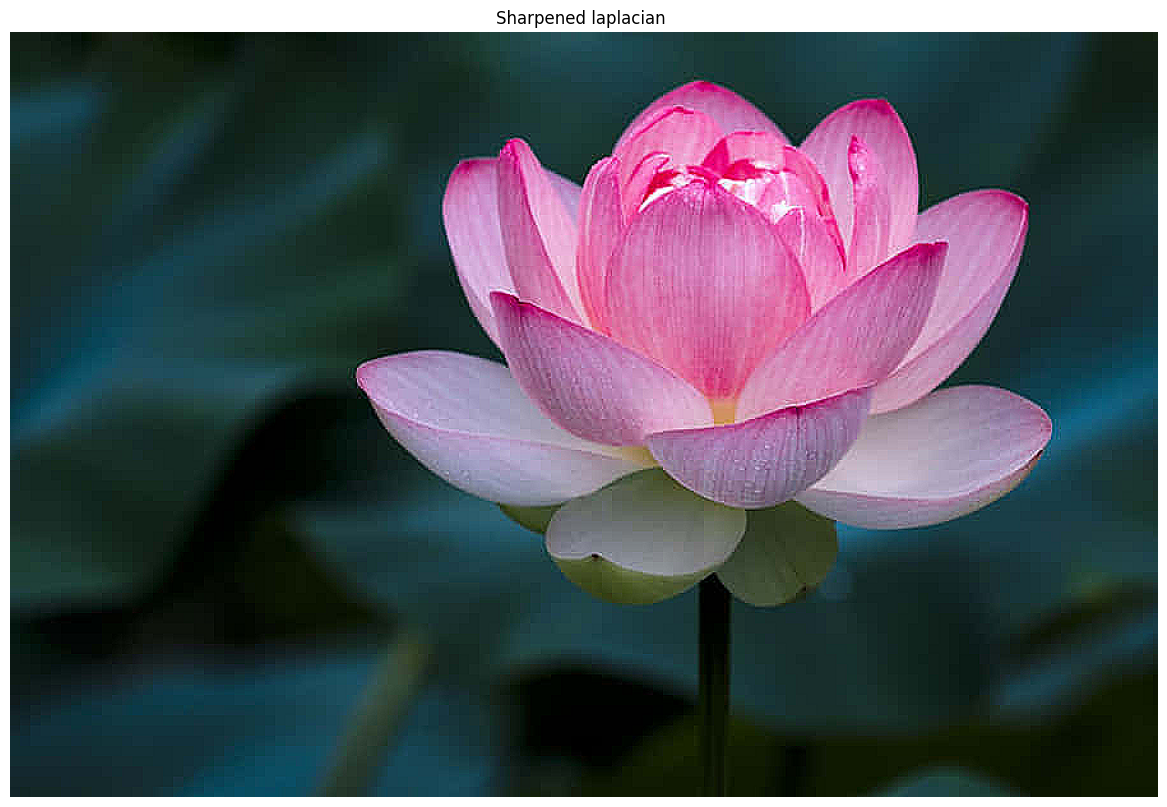

In [44]:
laplacian_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], dtype=np.float32)  # An example laplacian kernel, adjust values as needed
sharpened_image_laplacian = cv2.filter2D(img_rgb, -1, laplacian_kernel)
display_image(sharpened_image_laplacian, 'Sharpened laplacian ', 4)


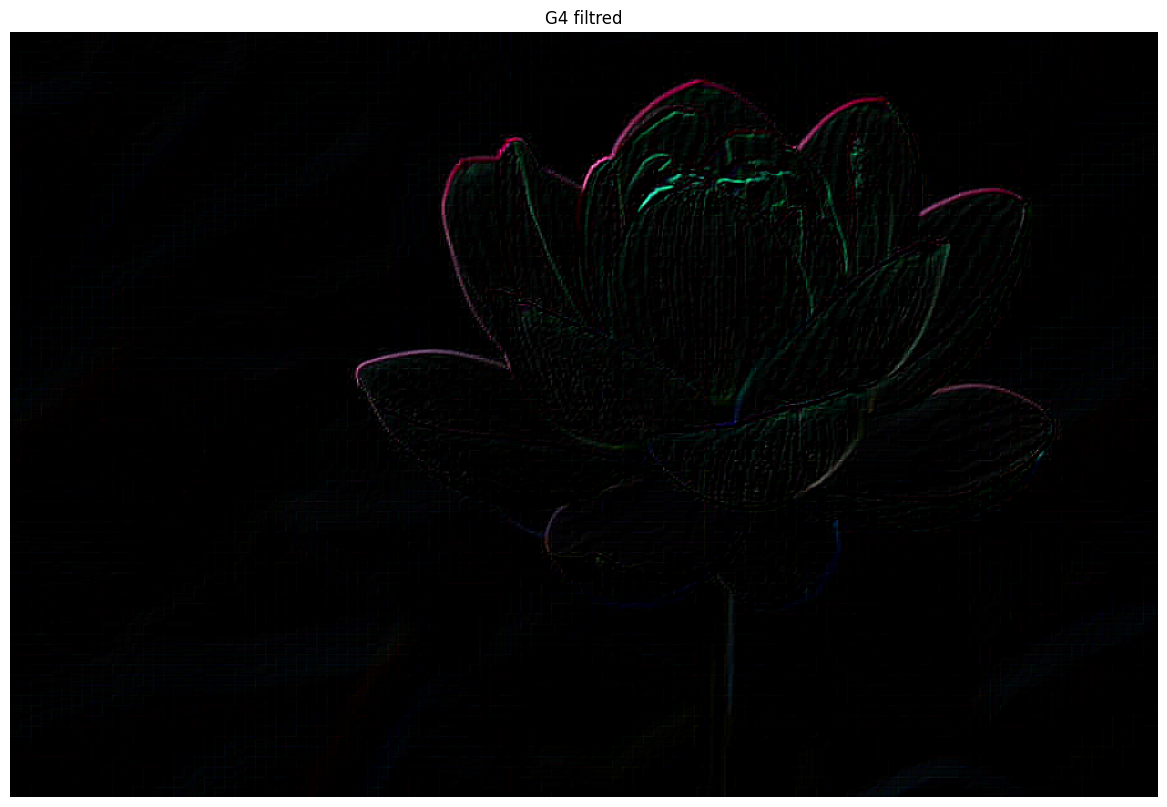

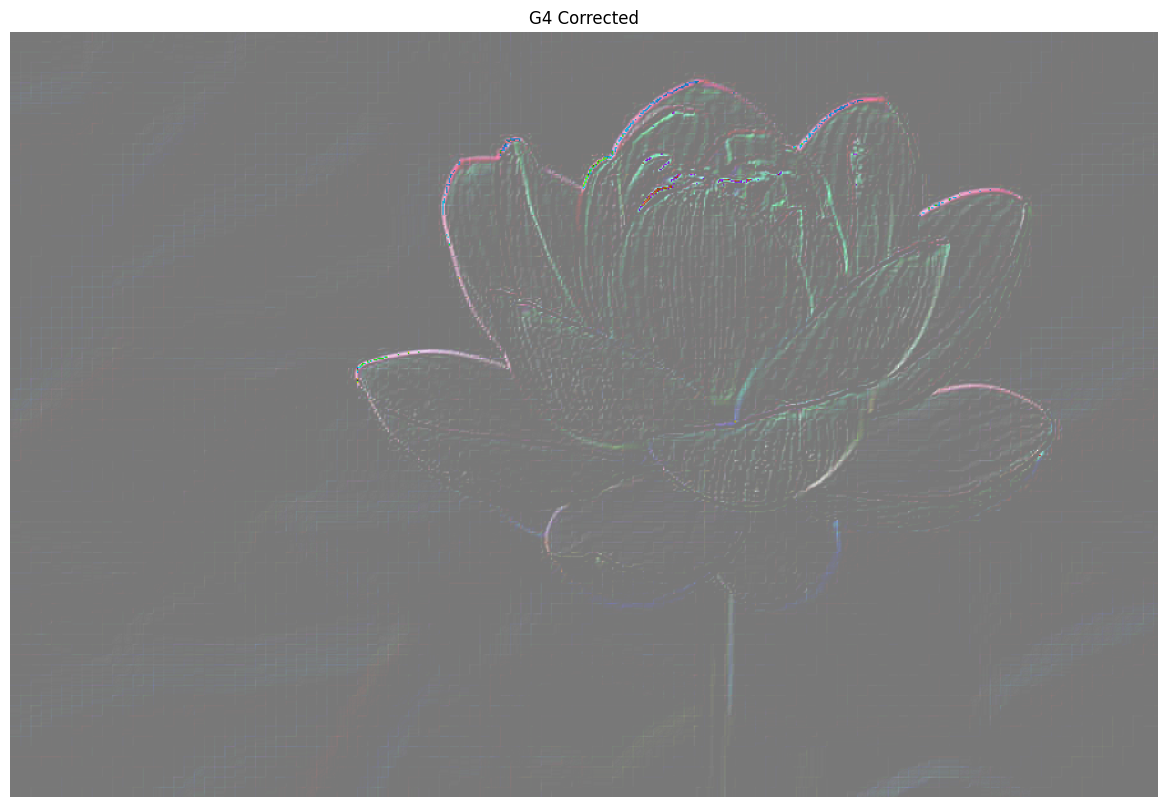

In [98]:
# --- G4 Filter and Correction ---
G4 = np.array([[-1, -1, 0], [-1, 3, 0], [0, 0, 0]], dtype=np.float32)
g4_filtered_img = cv2.filter2D(img_rgb, -1, G4)
g4_corrected = g4_filtered_img + 120 #0 to 1 for float images, 0 to 255 for int images.
display_image(g4_filtered_img, 'G4 filtred', 5)
display_image(g4_corrected, 'G4 Corrected', 5)

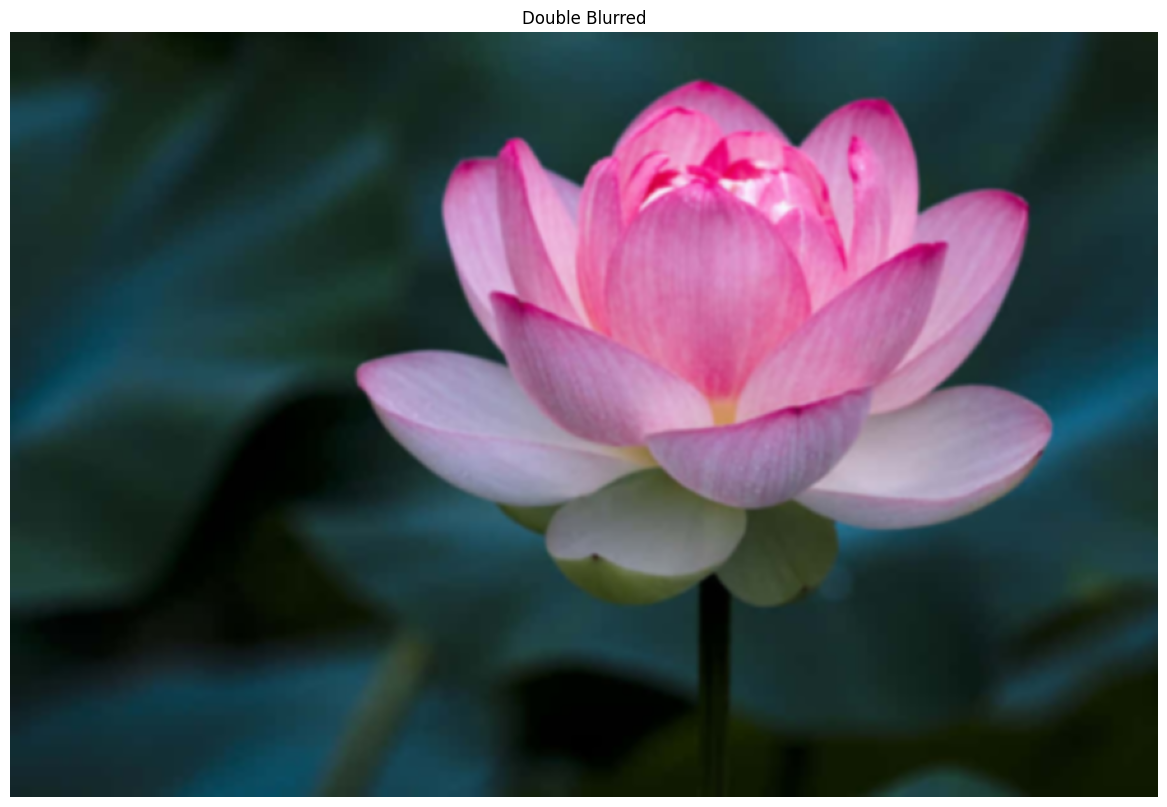

In [48]:

# --- Double Blur (G1 twice) ---
double_blurred = cv2.filter2D(blurred_img_g1, -1, G1)
display_image(double_blurred, 'Double Blurred', 6)

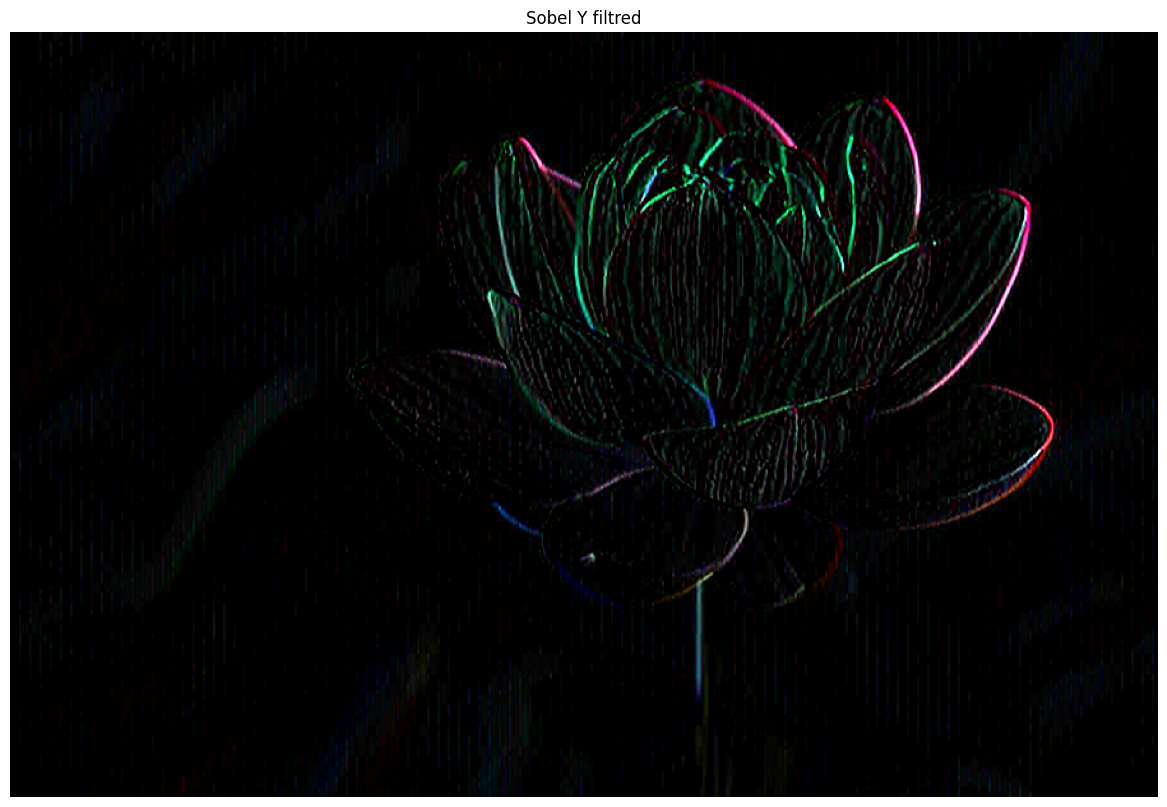

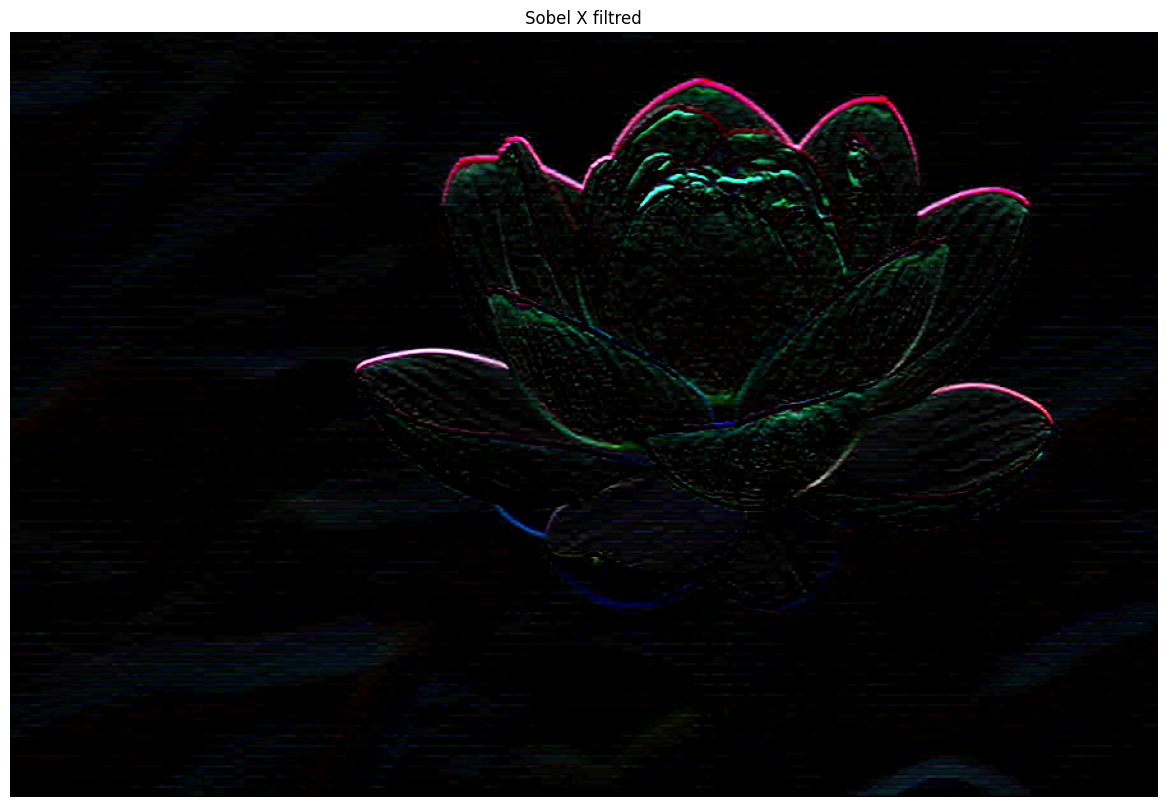

In [80]:

SOV = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]], dtype=np.float32)
sobelv_img = cv2.filter2D(img_rgb, -1, SOV)
display_image(sobelv_img, 'Sobel Y filtred', 5)
SOH = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)
sobelh_img = cv2.filter2D(img_rgb, -1, SOH)
display_image(sobelh_img, 'Sobel X filtred', 6)
